<header style="padding:1px;background:#f9f9f9;border-top:3px solid #00b2b1"><img id="Teradata-logo" src="https://www.teradata.com/Teradata/Images/Rebrand/Teradata_logo-two_color.png" alt="Teradata" width="220" align="right" />

<b style = 'font-size:28px;font-family:Arial;color:#E37C4D'>Applying Fourier Transform on signal series.</b>
    <br>
<b style = 'font-size:24px;font-family:Arial;color:#E37C4D'>Discrete Fast Fourier Transform and Convolve functions </b>
</header>

<p style = 'font-size:18px;font-family:Arial;color:#E37C4D'><b>Introduction</b></p>

<p style = 'font-size:16px;font-family:Arial'>The <b>Fourier transform</b> is one of the most important algorithms in all of 
science, mathematics, and communications technology.
<br>
<p style = 'font-size:16px;font-family:Arial'> The Fourier Theorem states that any signal can be perfectly represented as a sum of sine waves, each sine wave having its own phase, frequency, and amplitude. This provides an efficient way to <b>transform a signal (e.g. a radio wave) from the time domain to the frequency domain</b>. The time domain is what we are used to seeing (e.g. a radio wave is a fluctuation of signal amplitude over time). The frequency domain shows how much energy is in the signal at each frequency (sine wave speed). This allows us to view the individual components of a signal, and therefore provides a better understanding of complicated signals.

<br>

<p style = 'font-size:16px;font-family:Arial'>There are four parts to a wave:
wavelength(λ), period(T), frequency(f), and amplitude (A)</p>
<img id="signal wave" src="images/signal.png" alt="signal wave" width="400" />
<p style = 'font-size:16px;font-family:Arial'>The Angular Frequency is ω = 2π × f</p>

### Applications for FFT are
<p style = 'font-size:16px;font-family:Arial'>
<ul>
            <li  style = 'font-size:16px;font-family:Arial'>Digital Signal Processing</li>
            <li style = 'font-size:16px;font-family:Arial'>Noise reduction in signals</li>
            <li  style = 'font-size:16px;font-family:Arial'>Seasonality detection in timeseries</li>
            <li  style = 'font-size:16px;font-family:Arial'>Image Processing</li>
        </ul>    
</p>

<p style = 'font-size:16px;font-family:Arial'>
    In this demonstration we will use new <b>UAF </b>(Unbounded Array Framework) Vantage capabilities. With UAF functionality, Vantage can process one-dimensional series (series indexed by time or space) and two-dimensional arrays (matrix indexed by time, space or time and space). The series can reside in any Teradata supported or Teradata accessible table or in an analytic result table (ART). We will use the below functions in this demonstration:
<ul>    
    <li style = 'font-size:16px;font-family:Arial'> <b>TD_GENSERIES4FORMULA</b>-provides the ability for you to define and apply a formula to generate a time series </li>
    <li style = 'font-size:16px;font-family:Arial'> <b>TD_DFFT & TD_IDFFT</b> - TD_DFFT Applies the Discrete Fast Fourier Transform to a one-dimensional series and returns a result series containing the computed Fourier Coefficients. The coefficients can be in rectangular (real, imaginary) or polar (amplitude, phase). TD_IDFFT reverses the effects of a Fourier transform on a one-dimensional series. </li>
    <li style = 'font-size:16px;font-family:Arial'> <b>TD_CONVOLVE</b> - Applies digital filter to one-dimensional series by convolving time series with kernel filter </li>
    <li style = 'font-size:16px;font-family:Arial'> <b>TD_PLOT</b> - provides the ability to generate charts. The generated charts can be in the JPG, PNG, or SVG formats </li>
</ul>    
</p>  


<p style = 'font-size:16px;font-family:Arial;'>Let's do a simple example on sample data on how the signals with random noise looks like and how do we recognize noise using FFT.</p>
<p style = 'font-size:16px;font-family:Arial'><b>Steps</b></p>
<ul style = 'font-size:16px;font-family:Arial'>
    <li>Connect to Vantage</li>
    <li>Create data points for the series(genData)</li>
    <li>Create signal series (SINUSOIDS4) with 4 frequencies using TD_GENSERIES4FORMULA</li>
    <li>Create signal series (SINUSOIDS4_noise) with 4 frequencies and random noise added</li>
    <li>Apply TD_DFFT Fourier Transform function on both the series so find the significant frequencies</li>
    <li>Apply TD_IDFFT function to see that we can regenerate the original series</li>
    <li>Preparing a signal frequency of 100Hz to use as a filter</li>
    <li>Apply the TD_CONVOLVE function to the series (SINUSOIDS4_noise) to cancel all the frequencies except of 100Hz</li>
    <li>Clean up</li>
</ul>    
<hr>

<b style = 'font-size:28px;font-family:Arial;color:#E37C4D'>1. Connect to Vantage</b>
<p style = 'font-size:18px;font-family:Arial;color:#E37C4D'> <b>Let's start by connecting to the Teradata system </b></p>
<p style = 'font-size:16px;font-family:Arial'>You will be prompted to provide the password. Enter your password, press Enter, then use down arrow to go to next cell.</p>

In [1]:
%connect local, hidewarnings=true

Password: ········


Success: 'local' connection established and activated for user 'demo_user', with default database 'demo_user'


<p style = 'font-size:16px;font-family:Arial'>Setup for execution of notebook. Begin running steps with Shift + Enter keys.</p>

In [2]:
Set query_band='DEMO=FourierTransform.ipynb;' update for session;

Success: 1 rows affected

<p style = 'font-size:16px;font-family:Arial'>Optional step – if you want to see status of databases/tables created and space used.</p>

In [3]:
call space_report();  -- optional, takes about 10 seconds

Success: 0 rows affected

Success: 0 rows affected

,Space_Report
1,"You have: #databases=1 #tables=69 #views=10 You have used 26.1 MB of 27,914.4 MB available - 0.1% ... Space Usage OK"
2,
3,Database Name #tables #views Avail MB Used MB
4,"demo_user 69 9 27,914.4 MB 26.1 MB"
5,DEMO_RemaingUsefulLife 0 1 0.0 MB 0.0 MB


<b style = 'font-size:28px;font-family:Arial;color:#E37C4D'>2. Create the dataset</b>
<p style = 'font-size:16px;font-family:Arial'>We will create two signals with 400 datapoints. One pure signal which will have 4 sinusoidal frequencies of 2, 25, 50 & 100 Hz and other which will have random noise added as well. 

In [4]:
/* This table will be create 400 data points */
CREATE TABLE genData(ID integer, row_i integer, MAGNITUDE float);

Success: 0 rows affected

In [5]:
INSERT INTO genData values(1, 1, 1.0);
INSERT INTO genData SELECT ID, row_i+1, MAGNITUDE+1.0 FROM genData;
INSERT INTO genData SELECT ID, row_i+2, MAGNITUDE+2.0 FROM genData;
INSERT INTO genData SELECT ID, row_i+4, MAGNITUDE+4.0 FROM genData;
INSERT INTO genData SELECT ID, row_i+8, MAGNITUDE+8.0 FROM genData;
INSERT INTO genData SELECT ID, row_i+16, MAGNITUDE+16.0 FROM genData;
INSERT INTO genData SELECT ID, row_i+32, MAGNITUDE+32.0 FROM genData;
INSERT INTO genData SELECT ID, row_i+64, MAGNITUDE+64.0 FROM genData;
INSERT INTO genData SELECT ID, row_i+128, MAGNITUDE+128.0 FROM genData;
INSERT INTO genData SELECT ID, row_i+256, MAGNITUDE+256.0 FROM genData;

Success: 1 rows affected

Success: 1 rows affected

Success: 2 rows affected

Success: 4 rows affected

Success: 8 rows affected

Success: 16 rows affected

Success: 32 rows affected

Success: 64 rows affected

Success: 128 rows affected

Success: 256 rows affected

In [6]:
--To get only 400 data points
DELETE FROM GenData WHERE ROW_I>400.0;

Success: 112 rows affected

In [7]:
/*************************************************************************/
/*  Generate 400 Samplepoint Series which is the sum of 4 Sinusoids      */
/*  Sinusoids have frequencies (k) of: 2, 25, 50, 100                    */
/*************************************************************************/
EXECUTE FUNCTION INTO ART(SINUSOIDS4)
TD_GENSERIES4FORMULA(
  SERIES_SPEC(TABLE_NAME(GenData), SERIES_ID(ID), ROW_AXIS(SEQUENCE(ROW_I)),
  PAYLOAD( FIELDS(MAGNITUDE), CONTENT(REAL))
  ),
  FUNC_PARAMS(Formula('Y = 4.0*sin(6.283185307179586476*X1/200.0) +
                           4.0*sin(6.283185307179586476*X1/16.0 + 3.14159265358979323/4.0) + 
                           4.0*sin(6.283185307179586476*X1/8.0 + 3.14159265358979323/2.0) +
                           4.0*sin(6.283185307179586476*X1/4.0 + 3.14159265358979323/8.0)'))
);

/* 4.0*sin(6.283185307179586476*X1/200.0) - 2Hz frequnecy
   4.0*sin(6.283185307179586476*X1/16.0 + 3.14159265358979323/4.0) - 25Hz with phase added    
   4.0*sin(6.283185307179586476*X1/8.0 + 3.14159265358979323/2.0) - 50Hz with phase added 
   4.0*sin(6.283185307179586476*X1/4.0 + 3.14159265358979323/8.0) - 100Hz with phase added 
*/

Success: 400 rows affected

Success: 0 rows affected

<p style = 'font-size:16px;font-family:Arial'>Let's see what data is generated for the series.

In [8]:
select top 100 * from SINUSOIDS4;

,ID,ROW_I,MAGNITUDE
1,1,0,10.345106421148998
2,1,1,2.7204283486568963
3,1,2,-2.451993871472132
4,1,3,0.8604937884637671
5,1,4,3.0235625949202394
6,1,5,-0.7812084711174615
7,1,6,-1.525251769173146
8,1,7,3.6970661533735885
9,1,8,3.944391548903112
10,1,9,-4.294665751960561


<p style = 'font-size:16px;font-family:Arial'>Table SINUSOIDS4 is the table containing signal data of 4 sinusidal waves.</p>
<p style = 'font-size:16px;font-family:Arial'>We can see how the signal looks like using TD_PLOT.</p>


In [9]:
/**********************************************************************************/
/*                              PLOT generated sinusoidal signal                  */
/**********************************************************************************/

EXECUTE FUNCTION
TD_Plot
(
    SERIES_SPEC(TABLE_NAME(SINUSOIDS4), ROW_AXIS(SEQUENCE(ROW_I)), 
                SERIES_ID(ID),
                PAYLOAD(FIELDS(Magnitude), CONTENT(REAL)) ),
    FUNC_PARAMS( PLOTS[( TYPE('line'))], IMAGE('png')));

ID ROW_I IMAGE 1 0 0 89504e470d0a1a0a0000000d4948445200000280000001e00802000000bab34bb3000000097048597300000f6100000f6101a83fa7690000200049444154789cecbd69b46d57752636f75a7b9f735f27c985416054d47019c7a1127bd004625c76e224b65311238e4785b2410eb62b381949650c5224b8461cdb41364520985086609bd6768dc240199bc2b8a133bd4423190909210921a1be79ea5e73bb73ce6e567ecc35e79e6bef7dcebb6bee77ef7df7ddf5fdd0b8baefacbbf73967af35bb6f7e3373ce41424242424242c2dec2ecf70d2424242424241c4624039c9090909090b00f4806382121212121611f900c704242424242c23e2019e08484848484847d40bedf37108da6691e7ef8e1e3c78f6759b6dff7929090909090700e38e73636369ef18c67181304bd07cf003ffcf0c3575c71c57edf45424242424242041e78e081673ef399f23707cf001f3f7e1c001e78e08113274eecf7bd2424242424249c03ebebeb575c71051a2f8983678031f37ce2c4894b2eb964bfef2521212121216147e8974d13092b2121212121611f900c704242424242c23e2019e08484848484847dc05ed7808ba2c01fcab2ecffb2ff4f0909090909091725f6da006f6f6f43cfe25655958c6e42424242c2a1c25e1be03c1fbee2b2df0380736e7d7d9dff177f4e531413121212120e342e941af0e5975f7ee2c489e73def796f7ffbdbabaa92ffb4bebe7ea900aa706c6c6cecd39d2624242424249c075c107dc0987f9ecd66b7dc72cbab5ffdea93274fbeee75afe37f3d71e2c4993367f87f9775342724242424241c2064fb92cbcdb2a5d7bde79e7b5ef082173cf1c413cbd69e3d7bf6d24b2f3d73e64c12e24848484848b8f0b1cc6c5d282968469ee79d14744242424242c2c5870bc200bfe215afb8edb6dbaaaabae38e3b5ef9ca575e75d555fb7d47090909090909bb8bbd36c04551600f12ff0000575e79e54b5ffad213274e5c79e5952f78c10bdefce637eff15d252424242424ec31f6a7063c06a9069c90909090708070606ac00909090909098701c900272424242424ec0392013ea878e4ecec3fff7f3ff747d7debddf379290909090a04132c00715afffcb5bbff3d8e6d57f71eb7edf4842c201c0b5773efe9b1ffde6bc6af6fb4612125a24037c50717a2b754b271c227cf65b8f5ef5ee2f3f706a5bb7fce7dff3d53ffcd23d7f74ed3de7f5a61212462119e0838a59922b49384cf8a77f78fd97ee7af2d73f72f3983ff2c899adf3753f0909e3910cf041c5d6a2deef5b4848d86b9cde1e35b7746d7241a8df27242092013ea8d85c8c8d80b7cb64c2130e188e1676ccf263e39627249c5f24037c50312b47d1493ef7adc79ef31b1f7fc7e7ef3a5ff79390b00758cb3516b421b9a11401275c504806783ff1d1af3f74dbc367756b67e352d0affeb73702c01b3f76fb983f9290b0c73832d11860aed78c0ca01312ce2f923fb86fb8e6cec75ff5c11b01e09e37be44b17c568d32c0dba9849c7000714415c2aecf7cbd46153f2724ec165204bc6ff8fabda7c62c1f99829ea586c884830356ac5f5385b09b736f80eb03a67c9f70912319e07dc3d6b8103621e1f060abf416742dd71c591b6c809be477265c40480678df9048c809093bc4e6dc6f964265803905ddb8ecbcdd5342c2682403bc6f98a72a6c42c2cec03964ddf4d4cd1401275c90480678df301b11011fb421ce0909a32042588d051d9f82fedb7b4ffdc9f5f7e9d626242c436241ef1bb647b0a8e6543fcecda8945a91a78c5cc201401bc2aabcd6f599d7cf52530f5ffafb5f0280ef7bda8917fcbdef52fe8984841e5204bc6f18d308c425b1a9aa24c6486d91097b06e7e09e273675c99b8dd6826a4ce82607d0cda8dcd1436794a320121206910cf0be614c232fa7d4201b15c2eaba2a13121478d3276efff1dffedcef7df6db8ab59be4add62a03be41cb7506b8a655478bb45f12ce279201de378c898047d6b42a6a875c2bd20390b047f8fdcfdd0500bffdc93b146b37e63e02d659d076bf28160b212d9d0e5742c232a4f377df301f11017349ac52290bf0799452d0097b8c2cd33db114018f34c0b58ec3e5cdff48ca45424207c900ef1bd8ad5624d5f840d155b4d87e9b7119ec8484581c51f97c5be3a4acb8065ca932d8ccc1d699ff848465480678df301b51d6122968d581d21e67e94049d8534c5472cceb0b66516942d8b32d094bb15a6cb7b45f12ce2b9201de376c534b84a2acd592b0c4a835c572970e9484bdc59a6e9cd1b81076934bc8ba36e2f344a24e48e82019e07dc3f6880898536aa00a82f940592471fa84bdc55831675d1ff0f95a9e1cd684f38a6480f70d15194e4d043cce00af8fe39402c0c6bcfae8d71fda5c54e77e694282808ef7b7392e05cdfb45d746bcbe4dcbd30cb184f38a6480f7070bb193ab7129684d0979466d915a8ffe55efbfe1551fbcf1573f7cb36e79c2a185ae93a7358123b5a0756dc4e3ba981212962119e0fd4160413506b8e49f153efde67ce1d76a336a9ff9d66300f0d1af3fac5c9f70c8c086ef888a84354649a36adc6c04df02c46e4d35e084f38b648047e14faebfef93b79e542cdc1cc7a2da163dc49a143445c08ae05b427596261c46f0f0cda92e053da20f786b9cb30bc2df4d35e084f38ba4aca6c7dd8f6ffe8b3ffb0600dcf3c697c4aedd1c7728482ec91812d6488ffe4852e64bd819f8819f2849586c02a3d7ce44b947473a5cdf66ce84667942c232a408588f874eeb95d937840ea5220296541

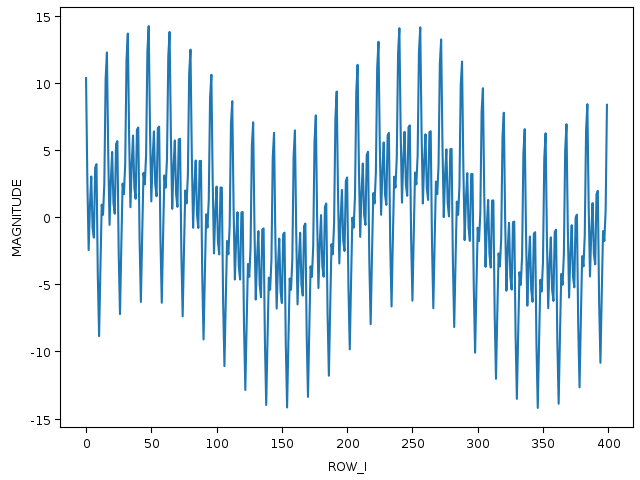

<p style = 'font-size:16px;font-family:Arial'><i>* Please <b> right click on the IMAGE column </b> from the output and choose view image to see the plot generated. </i>

<p style = 'font-size:16px;font-family:Arial'>If you followed the instructions above to View Image,  you should have seen image as below

<img id="sine wave" src="images/sin4wave.png" alt="Sine wave with no noise added" width="400" />
<p style = 'font-size:16px;font-family:Arial'>Sine wave with no noise added.</p>

<p style = 'font-size:16px;font-family:Arial'>Now, let us add some random <b>noise </b>in the signal. We have added a noise component 3* random(1,10)/random(1,3) in same sine frequencies as above signal.

In [10]:
EXECUTE FUNCTION INTO ART(SINUSOIDS4_noise)
TD_GENSERIES4FORMULA(
  SERIES_SPEC(TABLE_NAME(GenData), SERIES_ID(ID), ROW_AXIS(SEQUENCE(ROW_I)),
  PAYLOAD( FIELDS(MAGNITUDE), CONTENT(REAL))
  ),
  FUNC_PARAMS(Formula('Y = 4.0*sin(6.283185307179586476*X1/200.0) + 
                           4.0*sin(6.283185307179586476*X1/16.0 + 3.14159265358979323/4.0) + 
                           4.0*sin(6.283185307179586476*X1/8.0 + 3.14159265358979323/2.0) + 
                           4.0*sin(6.283185307179586476*X1/4.0 + 3.14159265358979323/8.0) + 
                           (3* random(1,10)/random(1,3))'))
);

Success: 400 rows affected

<p style = 'font-size:16px;font-family:Arial'>Let's see how the signal looks like now when it has noise added.

In [11]:
/**********************************************************************************/
/*             PLOT generated sinusoidal signal with noise added                  */
/**********************************************************************************/

EXECUTE FUNCTION
TD_Plot
(
    SERIES_SPEC(TABLE_NAME(SINUSOIDS4_noise), ROW_AXIS(SEQUENCE(ROW_I)), 
                SERIES_ID(ID),
                PAYLOAD(FIELDS(Magnitude), CONTENT(REAL)) ),
    FUNC_PARAMS( PLOTS[( TYPE('line'))], IMAGE('png')));


ID ROW_I IMAGE 1 0 0 89504e470d0a1a0a0000000d4948445200000280000001e00802000000bab34bb3000000097048597300000f6100000f6101a83fa7690000200049444154789cecbd7bd825575927faaeaafd5dfa967468206492893a06183ce213d164c870708011f478c1c1f108883e4106a320301ad1e399c773ba8d643268b84441309a0121e1322a10c143c80d42d2e4423ae49e4ec8bd73e9f4bdfbbbef5d55ebfcf1aecbbb6eb5ab6a7fdfae5dfdaddf1fc9eefdedaa5a55b5d67aefbf9771ce2122222222222262bc48da1e404444444444c47a4414c01111111111112d200ae0888888888888161005704444444444440b8802382222222222a205f4da1e406d1445f1ecb3cf6edebc9931d6f6582222222222228680733e3f3f7fca29a7248961f4764f003ffbecb3a79d765adba3888888888888a881a79e7aead4534fa5df744f006fdebc19009e7aeaa92d5bb6b43d9688888888888821989b9b3bedb4d3507851744f00a3e779cb962d279c7042db63898888888888a804376c1a93b02222222222225a4014c01111111111112d200ae0888888888888161005704444444444440b8802382222222222a20544011c1111111111d102a2008e888888888868015100474444444444b48028802322222222225a4014c01111111111112d200ae0888888888888161005704444444444440b8802382222222222a20544011c1111111111d102a2008e88888888886801510077125fbf77ef6bfee29bf73f73aced814444444444344414c09dc437eedbfbf8c1c51bbf7fa0ed814444444444344414c09d449e1700c081b73d908888888888868802b89b600c208adf888888880e230ae04ea2280a0028f2a2ed814444444444344414c01d068f267044444444671105702751141c000ad6f63822222222229a220ae04e02456fb48023222222ba8b28803b89a2c0ff46091c111111d1554401dc4970ced57f2322222222ba8828803b09060c00620e7444444444771105702791631952b480232222223a8b28803b8ce8828e888888e82ea200ee240ae00050f0588714111111d1554401dc49601634e7310a1c111111d155b420800f1c38f0833ff883535353ea9ba2282ebcf0c2934f3ef9e4934fbee8a28ba267752838266145f91b111111d159b420802fb8e08277bef39d5996a96faeb8e28a2bafbc72e7ce9d3b77eefcf297bffcc52f7e71fca3ea16d0f68d8a4a4444444477316e01bc7bf7eeaf7ded6be79f7f3efdf2b2cb2edbbe7dfb19679c71c619676cdfbefdd24b2fa57fe59c1f23989b9b83987fc4016216744444444497d11bf3f5defffef7ffe99ffee9c68d1be997bb77ef3efbecb3f1f359679db57bf76efad7b9b9b9134f3cd13acffcfcbcfbe5fa814cc28a0238222222a2ab18ab00beeebaebf6eeddfbb6b7bdcdfafef0e1c35bb76ec5cf5bb76e3d78f020fdeb962d5b8e1e3daafe39373777da69a76ddebc79ad473bc9400eca287f23222222ba8bb10ae0f3cf3fff631ffb5892d87eef934e3ae9c891232f78c10b00e0c89123dbb66da37f658c9d70c209d6218cadeb0a1c9184055102474444447415638d01df7df7ddaf7bddeba6a6a630055a2542bff4a52fbde38e3bf0f3ae5dbb5efce2178f73545d4451c424ac888888886e63ac16f06030509fa7a6a6969696f0f3dbdffef61d3b76fcc88ffc08005c70c105ef7ef7bbc739aaee220ae088888888ee62ac02b8d7eb79ff79eeb9e73ef1c413679e792600bcef7def7383c41116b011611e0b81232222223a8b7167412bd03aa2244976ecd8b163c78eb606d33d3080484519111111d165442aca4e22c77ec031092b222222a2b38802b8934012e858071c111111d15d4401dc4908c91b0570444444446711057047c101a08018038e888888e82aa200ee24720e0090e7310b3a222222a2ab8802b8931039e4eb9b0e2c222222a2d38802b893c0d86f11eb802322aae133373ff1c6bfbaf1d042bfed814444684401dc49145cff3722226228fe69d79ebb9f3eb6ebf1436d0f242242230ae04e828924ac288123222a01a336b1722f62a210057027212ce0e8818e88a806cc5be4316d22629210057027c10b0e269d6744444409505b8d2b2662a21005702791730671378988a80c0ed8c133ae9988094214c09d4411779388883ac8730e92443d226242100570378131e0988415d129b428fef2d83a2c62f210057027811b595ec43d25a233b8e6bebd675ef08d1b1edadfcad5738e4ea3562e1e11e14714c09d84684418779388eee03b8f1c3cba94ddfcc8c156ae8ef19a288023260a510077128548c28a7548119d41c1db4cddc72513eb8023260a51007714918823a263c004a8bc25feb60c5dd0913d2e6292100570279189bd8c7df4daef7ff0aadd6d0f27226238d0f86ccd04c5d2f9a8b3464c12a200ee263800c04a965f72dd839ff8d6230b2b59db038a38ce71f92d8fffcc47bffddcb1e5c667285a25832c84008e798b1113842880bb89020020cb0bce190064d1b116b1c6f893afdcf7e0deb90ffe7fcddd2d2802db12c0b9606f8d691311138428803b098cfee67233692bae16b1de30d76fee6bc95b7541e7c2fe8e1670c404210ae06e827300c8f29cfc2b2262ed31c24c2b72cc1c6c07a20c29c68023260951007712684c0ca4e11b8b2b22c6837c04172ed2c6b4e5042e62e57cc4e4210ae04e025dd06a2b8b0238623c1825db20cf0b684f041631061c31798802b8934081db97441c5100478c07a3cc349105dd52be8264ad8931e088094214c0dd04aaf3b

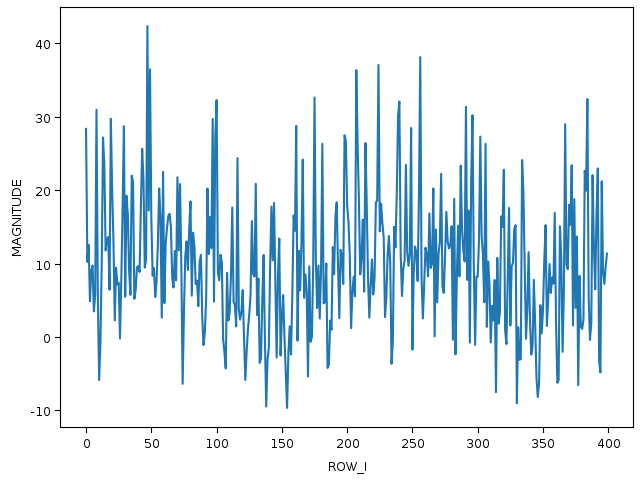

<b style = 'font-size:28px;font-family:Arial;color:#E37C4D'>3. TD_DFFT and TD_IDFFT</b>
<br>
<p style = font-size:16px;font-family:Arial>Discrete Fourier Transform (DFFT) & Inverse DFFT are the functions available in Vantage Clearscape Analytics which can convert any timeseries in frequency domain and vice versa using the Vantage's UAF (Unbounded Array Framework)</p>
<p style = 'font-size:16px;font-family:Arial'>Let us plot Fourier Transform to see if we can distinguish the main signals (sinusoids)
</p>

In [12]:
/**********************************************************************************/
/*          Applying TD_DFFT function with signal with no noise                   */
/**********************************************************************************/
EXECUTE FUNCTION INTO VOLATILE ART(DfftRaw_INTEGRAL) 
TD_DFFT(
  SERIES_SPEC( TABLE_NAME(SINUSOIDS4), SERIES_ID(ID), ROW_AXIS(SEQUENCE(ROW_I)),
               PAYLOAD( FIELDS(MAGNITUDE), CONTENT(REAL)) ),
  FUNC_PARAMS( FREQ_STYLE("K_INTEGRAL"), HUMAN_READABLE(1) ),
  OUTPUT_FMT( CONTENT(AMPL_PHASE_RADIANS) ) );

Success: 402 rows affected

<p style = 'font-size:16px;font-family:Arial'>The output of the TD_DFFT function creates a series with identifiers (seriesID & RowID) corresponding to the original series and Fourier Amplitude & Phase coefficient corresponding to ROW_I index (or Real & Imaginary depending on the parameters provided in the function).

In [13]:
/* Return Fourier Coeff rows having a significant magnitude */
SELECT * FROM DfftRaw_INTEGRAL WHERE Amplitude_Magnitude > 1.0;

,ID,ROW_I,AMPLITUDE_MAGNITUDE,PHASE_MAGNITUDE
1,1,-100,800.0000000000001,-0.39269908169871437
2,1,-50,799.9999999999989,-0.7853981633974361
3,1,-25,799.9999999999977,0.3926990816987299
4,1,-2,800.0000000000001,1.539380400259
5,1,2,800.0000000000001,-1.5393804002589997
6,1,25,799.9999999999977,-0.3926990816987295
7,1,50,799.9999999999987,0.7853981633974366
8,1,100,800.0000000000001,0.39269908169871437


In [14]:
/**********************************************************************************/
/*          Applying TD_DFFT function with signal with noise                      */
/**********************************************************************************/
EXECUTE FUNCTION INTO VOLATILE ART(DfftRaw_noise) 
TD_DFFT(
  SERIES_SPEC( TABLE_NAME(SINUSOIDS4_noise), SERIES_ID(ID), ROW_AXIS(SEQUENCE(ROW_I)),
               PAYLOAD( FIELDS(MAGNITUDE), CONTENT(REAL)) ),
  FUNC_PARAMS( FREQ_STYLE("K_INTEGRAL"), HUMAN_READABLE(1) ),
  OUTPUT_FMT( CONTENT(AMPL_PHASE_RADIANS) ) );

Success: 402 rows affected

<p style = 'font-size:16px;font-family:Arial'>Let's plot these transformed series to see if we can identify the significant frequencies in the signals.

In [15]:
/******************************************************************************************/
/*                           Plot the results of the DFFT of the Signal                  */
/******************************************************************************************/

EXECUTE FUNCTION
TD_Plot
(   SERIES_SPEC(TABLE_NAME(DfftRaw_INTEGRAL), ROW_AXIS(SEQUENCE(ROW_I)),SERIES_ID(ID),
                PAYLOAD(FIELDS(Amplitude_Magnitude),CONTENT(REAL)) ),
    FUNC_PARAMS( PLOTS[( TYPE('line') )], IMAGE('png'))
);


ID ROW_I IMAGE 1 0 0 89504e470d0a1a0a0000000d4948445200000280000001e00802000000bab34bb3000000097048597300000f6100000f6101a83fa7690000200049444154789cedbd7f9055c599ffdfe732308a333048e1d530ab12a110361a249f418c9545b6366ca259365612e5477488b1c8863598b82618ddecdc2545b1c688b221aba18a5d95106292cf5ae3f2fde80a9ad2381a2d99a8313a2126710045d4813bdcc1e1c7dcd3df3ffafce83e33733d03fd9c7b9e73dfaf3fe4dc06fb749f736f3ffd3cfdfc70a4940200000000c992abf600000000805a040218000000a80210c00000004015800006000000aa0004300000005005eaaa3d8013c775dd7dfbf6353434388e53edb1000000004323a5ecebeb3bebacb3723943e9652c80f7eddbd7dcdc5ced51000000001fccdebd7b274f9eacb73016c00d0d0d4288bd7bf7363636567b2c000000c0d0944aa5e6e66625b374180b6065796e6c6c1c376e5cb5c7020000005462f069299cb0000000802a00010c00000054010860000000a00a40000300000055000218000000a80210c00000004015800006000000aa00043000000050052080010000802a00010c00000054010860000000a00a40000300000055000218000000a802b402f88d37def8ec673f3b69d2a44993267df6b39f7de38d3754bbebba6bd6acc9e7f3f97c7eeddab552cacaed00000040c6a015c08b172f3efffcf35f7df5d5575f7d75faf4e94b972e55ed5bb66c696f6fefe8e8e8e8e878e8a1871e7cf0c1caed00000040d690948c1d3bb6b7b7575d178bc5b163c7aaeb79f3e66ddbb64d5d6fdbb66dfefcf995db15aeebf66aecddbb5708512c1649a70012e389aefdf3bef74467f7c16a0fe4c4d9f0f8ae05773d597cff1851ff5d6f1f9a77c7130fbff4a6f59effdf6ff7cdfbde13bf7bd3fbb5feeecdde79df7be2fffd769ff51b3dfcd29bf3ee78a2ebed43d67b5614df3fb6e0ae27373cbe8ba8ff04d8d97d60def79ef865d73bd51e08b0466f6faf1022908601b41af082050beebaebae52a9542a95eebaebae050b16a8f6aeaeae3973e6a8eb969696aeaeaecaed8a52a9345ea3b9b95908d1d7d7473a0590183b5eddff46cffb4fee7ab7da0339711e7e79dfefdf2ebdbcb797a8ff8ed7df7de3bdf71ffdeddbd67bfedf57f6bdd1f37ec7ebefa98fbffac37b6ff4bcbffd77fbacdfe8d1dfee7be3bdf79ff16f649d97f7167fff7669dbcbf61f51623cf9fb77dfe8797fc76bfbab3d10404e1d69ef1b366cb8e4924b0a858210e22ffee22f9e7df659d57ef0e0c1a6a62675ddd4d4d4d3d353b95dd1d8d8a8f6118a52a9d4dcdcdcd0d0403a05901852cae0bf4c71841a3cd514fc6743d0bfe308215cbf6329a4fed13a92f811b964fd27811482f90f01c4845603fed297beb478f1e277de79e79d77de59bc78f197bef425d53e61c28462b1a8ae8bc5e2c489132bb72b1cc719a7d1d8d8a81a49a70012c411824e782581eb0a118a49fb4849f56d77a52b06cb45821f97eb4917eb1d7ba88e1dce5f23f51620806b015a01fcab5ffdeab6db6e535ed0b7de7a6b4747876a9f3e7d7a6767a7badeb973e7b469d32ab7835ac05b77382f9df45b0857d028a6d2353faa9b455aeddc494917aa9d84a701130c3c31fcf70bd522fbd00ae08f7ef4a3ebd6ad5367c0dffffef72fbcf042d5be6cd9b242a1b067cf9e3d7bf6ac5ebdfafaebafafdc0e6a01d7a5357b268074957421eb5fc92d8a1b388ed0b60ede4408c498eb89152a09e96de0580b2f6f1bc7f99700e2417b067cdf7df7dd78e38d679f7db61062ce9c39f7df7fbf6a6f6d6dedeeee9e356b961062e5ca954178d270eda086e0bc74968510944ba7da9db8048fc8f524ae7fc8ac643c8509dab3d2d36ac092f33ece9552f86f04641b5a017cfef9e7ffeffffeefe0f65c2e5728149473569c76500bb852f901715e77c8e40a3de6b9a32304671950aef6004e06d6bf003022908a1200cb507a1829dd88aaffc420f4af86f4027c80000669c177feacf6384e0257b882f5147c05de3ffdb53f132fd88cce4aaf4e97199b2284f062c0584f01c4020218a40dbee2cb1bbb4be86124044d808a171de40f9ce29859e1501ff2bbea3f8cad04ea801c4e58b5000430480b2e71804a02f84545c8fa77a5209261caf1c7313f128800ef2ddbefd8433aeca3c9398f1d8c0c0860901a94edb0daa33829941e49961c467a7291400376bc1b78371254f14e9e099aec1058ba2aa30867c8de32481b10c0203538c44992e8f18eb1e9bca43cb1482080bddd8fb7759064f14e7eff6402380b1ab0779201320f0430480bde3124efb5d311a41a30f1a21c88454fd5a648c4e1e78aa482ffb7c87bec0ee329809840000300000055000218a406559087b3e58d2c78c7ef5fe5c7a0c8051d294545a77d3954492e15fe213663573e41f69641da80000669c14bfdcf79e5f4f2491176af3244dabf8363d691a02bc8a33658d4a7cb9c7771feee0475de6a0008609016d4ba437dcc498a2ba9e496423949d11ccd1af9315cafa2817d1940e75fedf76ffec910d7515ed09c7f09201e10c0203528133467df13b5641206b97a1e4604723112f8eb5941298cddea3f74858df9c7f0f0df898298400083b4e0a5fe67bdeea819d0a977be04a6c2178b74aabc4c245b27eb2f91f7826182ae012080417a90da7f79422d583cf96b5fbeb8e6d681701e5eb0375d228ef02e4cf1de05bcb06a000860902e782f3b7c9d6f9d48250caa549409c1da04ede9be9ca700e201010c806528636c884dd0f

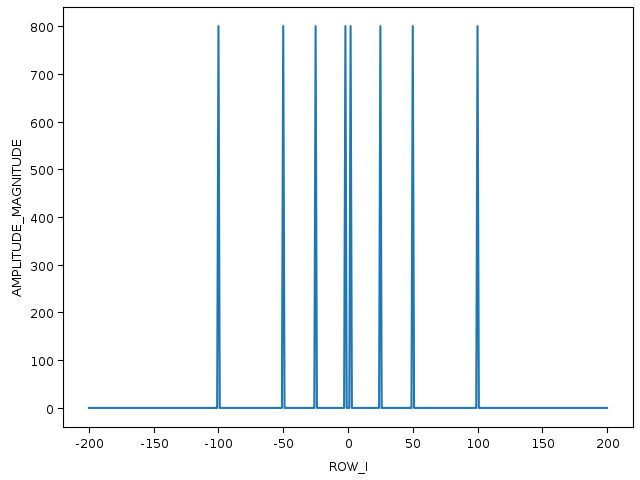

<p style = 'font-size:16px;font-family:Arial'>In the image plot produced we can clearly see that the significant frequencies(2, 20, 50 & 100 Hz) in the signal which corresponds to the ones we used to create our signal.

In [16]:
/******************************************************************************************/
/*                           Plot the results of the DFFT of the Signal                  */
/******************************************************************************************/
EXECUTE FUNCTION
TD_Plot
(   SERIES_SPEC(TABLE_NAME(DfftRaw_noise), ROW_AXIS(SEQUENCE(ROW_I)),SERIES_ID(ID),
                PAYLOAD(FIELDS(Amplitude_Magnitude),CONTENT(REAL)) ),
    FUNC_PARAMS( PLOTS[( TYPE('line') )], IMAGE('png'))
);

ID ROW_I IMAGE 1 0 0 89504e470d0a1a0a0000000d4948445200000280000001e00802000000bab34bb3000000097048597300000f6100000f6101a83fa7690000200049444154789cecdd7b6014d5d93ff06793dddc37d910216022178522b458c042a5d60bb6b52db5beafad17845aa8f2f2565ea5d5d2e2abaf0d85222f52515a7f88585a2d52a4f455a1b42017914bb869c22d400824211772df64efd7d999df1f67677676b35937610f9b5dbe9f7f981c36b3673733f3cc39e73967349224110000005c5d29f1ae000000c0b50801180000200e1080010000e20001180000200e1080010000e2401bef0ac49e288acdcdcd3939391a8d26de750100806b9d2449369b6dc890212929418dde240cc0cdcdcdc5c5c5f1ae0500004040636363515191ba240903704e4e0e11353636eaf5fa78d7050000ae7556abb5b8b898c526b5240cc0ace759afd7e7e6e6c6bb2e00000044726c524312160000401c2000030000c40102300000401c2000030000c40102300000401c2000030000c40102300000401c2000030000c40102300000401c2000030000c40102300000401c2000030000c40102300000401c2000030000c4c1d508c01d1d1dc3870fd7e9744a89288a4b972e2d2c2c2c2c2c5cb66c9924497d2b07000048505723002f5ebc78ce9c39822028251b366cd8b2654b6969696969e9071f7cb069d3a6be950300279244fff9ee67fff9ee67b8dd05e045e2ecdcb97323468cb0dbedeaf7baebaebbb66ddbc6b6b76ddb3675ead4be9533a2289a551a1b1b89c8643271fd5c00c9cde6f60e5bb86dd8c26d76b710efba002436b3d94c4466b339a45ccb3bc02f58b0e037bff94d565696bab0b2b272f2e4c96c7bd2a4499595957d2b67ac566b5e5e5ec8fbda6cb6ee8500102d49f9174d60002ef806e03d7bf6b4b4b4cc9c3933a4bcababcb6030b06d83c160341afb56cee8f57a767fc158add6e2e2e29c9c9c587f1a806b8814660b006289ef18f0b3cf3efbeaabafa6a484be4b7e7ebec96462db2693a9a0a0a06fe58c46a3c955d1ebf5ac90cf6702b826488116300070c137009f3a75ea9e7beed1e9742c055a49841e3d7a74797939db2e2b2b1b356a54dfca018013498ec048c202e0846f17b4d7eb55b6753a9dd3e964dbb367cf5eb468d1d8b1638968f1e2c5f3e6cdeb5b390070a2845d091118800fbe0158abd586fd71d6ac59757575e3c78f27a2f9f3e72b83c4bd2d07004ed0050dc09b26f96e6f2d164b5e5e9ed96ccecdcd8d775d001295c9e11dbf7827119d2cb9372f53f7b9af07809ef41495b014250084a1cc3e4aba5b7480fe02011800c290300f18803304600088042d60004e108001200cc45d00de108001200c8c0103f086000c0061600c1880370460000843b510473cab0190c41080010000e200011800c208ac051ddf7a00242f04600008036b4103f086000c0061602d6800de108001202c4c4302e00b011800c250c55d4460002e108001208c401734e22f001f08c0001006e60103f086000c0000100708c0001006e60103f086000c0061601e30006f08c0001006e60103f086000c0061e0718400bc2100034018781c21006f08c00010095ac0009c200003401888bb00bc2100030000c4010230008481242c00de108001200c246101f086000c0061602d6800de108001200c2c4509c01b0230008481a52801784300068030b01425006f08c000108e842c6800be1080010000e200011800c208b47bd10406e003011800c2c01830006f08c0001006e60103f086000c00614892e8df886f3d009217023000842191c6bf21476200882d04600008433506ac896b45009216df00bc73e7cebbefbe3b3b3bbbb8b8f8f1c71f6f6a6a62e5ba60caeb45515cba74696161616161e1b265cb9425787a2a07004ef0342400def806e0254b96cc9b37efd2a54ba74e9d2a2a2afad18f7ec4ca054170aa28afdfb061c3962d5b4a4b4b4b4b4b3ff8e0834d9b36452e07000048505aae7bdfbf7fbf46e3efbffad5af7e3568d0a0c01b6bc3bcf5ba75eb4a4a4a468e1c4944252525afbcf2caf4e9d3239433922459ad56e547b68d5632c015c1e3080138e3db0256a2afd3e95cb366cddd77dfadfc576161a15eaf9f3061c2ebafbf2e08022bacacac9c3c7932db9e346952656565e472c66ab5e6a91417171391cd66e3f8c100929d14660b0062896f0b98d1e97482200c1a34e8e0c183acc4ebf51291cbe5aaa8a878e699675a5b5b972c5942445d5d5d068381bdc66030188d46b6dd5339a3d7ebcd66b3f2a3d56a2d2e2ecec9c9e1fcb100921916e200e0ed6a64413b9dce8e8e8eb973e7ce9933879568b55aad569b939373db6db76ddcb871f5ead5ac3c3f3fdf6432b16d93c954505010b99cd16834b92a7abd9e548d6f00e803246101f0763502b056ab2d2828f8c52f7e71e4c891b0ffab74418f1e3dbabcbc9c6d9795958d1a352a7239007022610c188033be01f8f1c71fafaaaaf2f97c4d4d4d252525ca18f0638f3d76eedc394110aaaaaa9e78e289193366b0f2d9b3672f5ab4a8a1a1a1a1a161f1e2c54a8bb9a77200e0044b5102f0c6770cf85bdffad6030f3c70f1e2c5810307de77df7d6fbffd362b9f366dda830f3e585353535454f4f0c30fbff0c20bac7cd6ac59757575e3c78f27a2f9f3e7cf9c393372390070a2cc2340fc05e044937cd3752c164b5e5e9ed96ccecdcd8d775d0012d5a7973a1f5a739888fefee4d7be322c3fded50148603d45252c450900e12863c049778f0ed04f200003401898070cc01b023000848

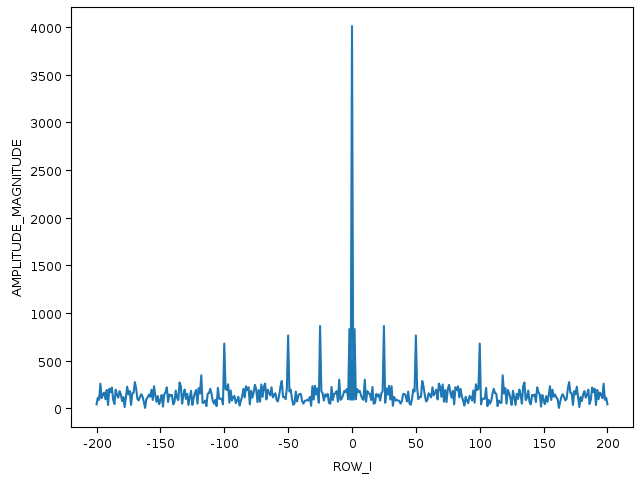

<p style = 'font-size:16px;font-family:Arial'>Now we can clearly see that both the series have the same significant frequencies but one has random noises which has created fluctuations in the DFFT plot above.

<p style = 'font-size:16px;font-family:Arial'><b>We can recreate our original signals(time domain) from the dfft (frequency domain)</b></p>

In [17]:
/**********************************************************************************/
/*               TAKE INVERSE DFFT of PREVIOUS DFFT OUTPUT                        */
/**********************************************************************************/
EXECUTE FUNCTION INTO VOLATILE ART(ReturnOriginal) 
        TD_IDFFT(ART_SPEC(TABLE_NAME(DfftRaw_INTEGRAL),
                          PAYLOAD( FIELDS(AMPLITUDE_MAGNITUDE,PHASE_MAGNITUDE), 
                                   CONTENT(AMPL_PHASE_RADIANS))) );

Success: 400 rows affected

In [18]:
/******************************************************************************************/
/*                           Plot the results of the IDFFT of the Signal                  */
/******************************************************************************************/
EXECUTE FUNCTION
TD_Plot
(
    SERIES_SPEC(TABLE_NAME(ReturnOriginal), ROW_AXIS(SEQUENCE(ROW_I)), SERIES_ID(ID),
                PAYLOAD(FIELDS(Real_Amplitude_Magnitude), CONTENT(REAL))),
    FUNC_PARAMS(PLOTS[(TYPE('line'))], IMAGE('png')));

ID ROW_I IMAGE 1 0 0 89504e470d0a1a0a0000000d4948445200000280000001e00802000000bab34bb3000000097048597300000f6100000f6101a83fa7690000200049444154789cecbd79b86d57552f38e65c6bed7d6e97c04308488a46a014eac5cf40d1c9a33eab9e5aef450a1f2522c487f80a8bafa8427c58289f22451e900241636245e99f284d1015e99426f4248424a4252621a4bf210d69eebda7dbcd6a66fd31e6986bccb5d6de77cfb14e7bcffcfd91efe4dc3dcf5a7bef35e7e87ee33794310622222222222222b6167abb6f202222222222622f221ae08888888888886d4034c0111111111111db806880232222222222b601d1004744444444446c03d2edbe8160545575cf3df71c3c785029b5ddf7121111111111711c18635657571ff398c768ed05bdbbcf00df73cf3da79e7aea76df4544444444444400eebaebaec73ef6b1fc37bbcf001f3c781000eebaebae43870e6df7bd4444444444441c072b2b2ba79e7a2a1a2f8edd678031f37ce8d0a1934e3a69bbef2522222222226221b4cba69184151111111111b10d8806382222222222621b100d704444444444c43660ab6bc05996e10f799eb77fd9fea788888888888813125b6d8047a311b42c6e5114d1e84644444444ec296cb5014ed3ee2bcefa3d001863565656dcffe2cf718a6244444444c4aec64ea9019f72ca29870e1d3afdf4d3cf3ffffca228f83fadacac9ccc802a1cabababdb74a71111111111111b801dd1078cf9e7f1787cdd75d7bdee75afbbefbefbdefad6b7ba7f3d74e8d0b163c7dcffceea688e8888888888d84550db92cb556ae6756fbffdf6673ce3190f3ef8e0acb5cbcbcb279f7cf2b163c7a2104744444444c4cec72cb3b55352d00e699a3652d0111111111111271e7684017ef9cb5f7ec30d37144571d34d37bdf295af3cf3cc33b7fb8e22222222222236175b6d80b32cc31e24f703009c71c6192f7ef18b0f1d3a74c619673ce319cff8933ff9932dbeab8888888888882dc6f6d480fb20d68023222222227611764d0d382222222222622f201ae08888888888886d4034c0bb15f72e8fffa73ffdfa872ebe6dbb6f242222222242826880772bcefedcf5b7debf76d667afdfee1b8988d805b8f8e607fecb67fe655254db7d23111135a201dead38ba1ebba523f610bef6fd1f9df9fe4bee3a32922dfff50f5cfa57dfbefd4317dfbea1371511d10bd100ef568ca35c49c45ec27ffaabcbbf7dcb437ff4a96bfbfc917b8fad6fd4fd4444f44734c0bb15ebd372bb6f212262ab7174d46b6ee9d26047a8df474420a201dead589bf68d80477934e111bb0cfbb3a4cff203fd9647446c2ca201dead18e7bde8245ffffefd4f7dd317def38d5b36ea7e2222b6004ba9c4825624371423e0881d856880b7139fb9faee1bee5996ad1df74b41bfee6faf0280777cfec63e7f2422628bb16f2031c0ae5ed333808e88d858447f70db70d1cd0fbcf6e35701c0edeff825c1f271d1cb008f6209396217629f28845d19db7a8d287e8e88d82cc40878db70f51d47fa2cef99821ec786c888dd03a758bf240a61d726d60097bb4cf93ee2044734c0db86f57e216c44c4dec17a6e2de8522a39b2569d01aea2df19b183100df0b6219290232216c4dac46e964c64805d0aba326ac3ee2922a237a201de364c621536226231b81cb26c7aea5a8c80237624a201de368c7b44c0bb6d887344442fb010566241fba7a0bf7bc7914f5c7ea76c6d44c42c4416f4b661d4834535a1fa71aa7ba5d4b23466e4227601ea1056e4b5ae8cad7e96987af8e2777f1b009ef4a843cf78fcc3857f2222a28518016f1bfa3402b992d850541273886d91115b0663e0f607d764c99bd5da824a4ce89a0ba0ab5eb9a3bb8f094741444474221ae06d439f465e975203d52b84957555464408f0ce2fdef873effafa5f7eed0782b56be4ad962203be4acb6506b8a455fbb3b85f223612d1006f1bfa44c03d6b5a05b5432e65f10188d822bcfbebb700c0bbbe749360edeac446c0320b5aef17c16226a425d3e18a88988578fe6e1b263d226057122b44ca02ee3c8a29e8882d8652b2279622e09e06b89471b8acf9ef49b9888868201ae06d8373ab05493577a0c82a5ace7eeb7e19ec888850ec13f97cebfda4ac5c0db81065b01d075b66fe232266211ae06dc3b847598ba5a045074a7d9cc50325624b3110c931af4c1d8b4a12c22ed7242cc16ab6dde27e89d8504403bc6d18514b84a0ac5593b0d8a835c172130f9488adc5926c9c51bf1076cd9590656dc41b44a28e8868201ae06dc3a84704ec526a200a82dd81328de2f4115b8bbe62ceb23ee08d5a1e1dd6880d4534c0db86820ca72402ee678057fa714a016075527ce6eabbd7a6c5f15f1a11c120e3fdadf54b41bbfd226b235e19d1f238432c6243110df0f660ca7672d12f052d29218fa92d52ead1bff66357bef6e357fdc127af952d8fd8b39075f2d426b0a716b4ac8db85f175344c42c4403bc3df02ca8c400e7ee67814fbf3699dab5d28cda57bf7f3f007ce6ea7b84eb23f6189ce1db272261f551d2282a33eec1b700b65b630d386263110d702f7ce2f23bbf74fd7d82856bfd585423d6432c494153042c08be39446769c45e841bbe3994a5a07bf401aff7737681f9bbb1061cb1b188ca6a72dcf6c0daefffc3f700e0f677fc52e8dab57e8702e792f42161f5f4e8f74565be88c5e01ef8819084e54c60f0da312bf7c848872b23c799902c8f8898851801cb71f751b932fb2ad3a11444c09c8a226a23b6074adeef4439100d70c46

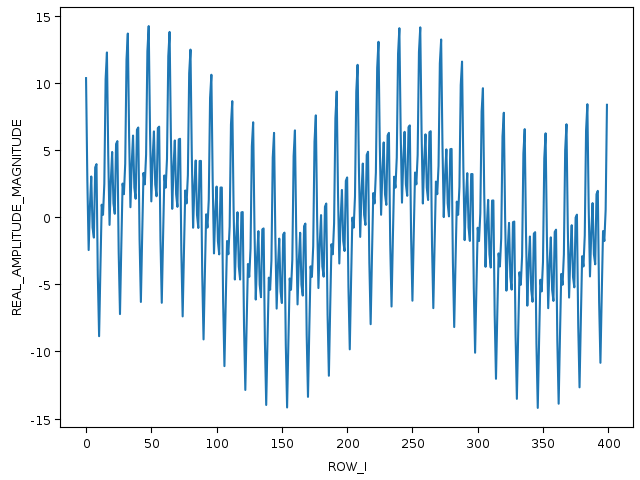

In [19]:
EXECUTE FUNCTION INTO VOLATILE ART(ReturnOriginal_noise) 
        TD_IDFFT(ART_SPEC(TABLE_NAME(DfftRaw_noise),
                          PAYLOAD( FIELDS(AMPLITUDE_MAGNITUDE,PHASE_MAGNITUDE), 
                                   CONTENT(AMPL_PHASE_RADIANS))) );

Success: 400 rows affected

In [20]:
/******************************************************************************************/
/*                           Plot the results of the IDFFT of the Signal                  */
/******************************************************************************************/
EXECUTE FUNCTION
TD_Plot
(
    SERIES_SPEC(TABLE_NAME(ReturnOriginal_noise), ROW_AXIS(SEQUENCE(ROW_I)), SERIES_ID(ID),
                PAYLOAD(FIELDS(Real_Amplitude_Magnitude), CONTENT(REAL))),
    FUNC_PARAMS(PLOTS[(TYPE('line'))], IMAGE('png')));

ID ROW_I IMAGE 1 0 0 89504e470d0a1a0a0000000d4948445200000280000001e00802000000bab34bb3000000097048597300000f6100000f6101a83fa7690000200049444154789cecbd79bc2555752fbe76d539f7de9ea0b10348e81f9a8803fe241fe804223126e82f0e3f93981863d4675e303e432241638cd3cf24af5b228f240891c4a821f21c00950c1a8cf98134a0082d8334f3d0207333f4747bb8d3b9f79caadaef8fb587b577edaa5355e79e53a7baf7f70f387deea9aa5d557bef357dd75a8c730e1e1e1e1e1e1e1ea34550f7003c3c3c3c3c3c0e457801ece1e1e1e1e15103bc00f6f0f0f0f0f0a8015e007b7878787878d4002f803d3c3c3c3c3c6a40abee0194469224cf3df7dcead5ab1963758fc5c3c3c3c3c3a30f38e7737373c71c734c1018466ff304f073cf3db77efdfaba47e1e1e1e1e1e151024f3ffdf4b1c71e4bbf699e005ebd7a35003cfdf4d36bd6aca97b2c1e1e1e1e1e1e7d303b3bbb7efd7a145e14cd13c0e8795eb366cd61871d56f7583c3c3c3c3c3c0a211d36f5242c0f0f0f0f0f8f1ae005b08787878787470df002d8c3c3c3c3c3a3067801ece1e1e1e1e15103bc00f6f0f0f0f0f0a8015e007b7878787878d4002f803d3c3c3c3c3c6a8017c01e1e1e1e1e1e35c00b600f0f0f0f0f8f1ae005b08787878787470df002d8c3c3c3c3c3a3067801ece1e1e1e1e15103bc00f6f0f0f0f0f0a8015e007b7878787878d4002f803d3c3c3c3c3c6a8017c08dc455f7ed38fdfcef3df0ec4cdd03f1f0f0f0f0a8082f801b89efdebfe389e9851b7fbca7ee817878787878548417c08d441c2700c081d73d100f0f0f0f8f8af002b899600cc08b5f0f0f0f8f06c30be0462249120048e2a4ee817878787878548417c00d06f726b08787874763e105702391241c001256f7383c3c3c3c3caac20be0460245afb7803d3c3c3c9a0b2f801b8924c1ff7a09ece1e1e1d1547801dc4870ced57f3d3c3c3c3c9a082f801b09060c003c07dac3c3c3a3b9f002b89188310dc95bc01e1e1e1e8d8517c00d8677417b78787834175e00371209700048b8cf43f2f0f0f0682abc006e249005cdb98f027b78787834153508e03d7bf6bcf0852f6cb7dbea9b2449ce3df7dca38f3efae8a38f3eefbcf3bc67b52f3892b0bcfcf5f0f0f0682c6a10c0e79c73ce7bdffbde288ad437975f7ef995575eb965cb962d5bb67ceb5bdfbae28a2b463faa66016d5fafa8787878783417a316c0dbb66dfbce77bef3a10f7d887e79c925976cdcb8f1f8e38f3ffef8e3376edc78f1c517d3bf72ce6708666767c1f38f388067417b7878783419ad115fefc31ffef0273ff9c9952b57d22fb76ddb76eaa9a7e2e7534e3965dbb66df4afb3b3b3871f7eb8759eb9b9b9f497870e2409cb0b600f0f0f8fa662a402f8baebaedbb163c7bbdef52eebfb7dfbf6ad5dbb163faf5dbb767a7a9afe75cd9a35070e1c50ff9c9d9d5dbf7efdead5ab873dda7106d6a0f4f2d7c3c3c3a3b918a900fed0873ef4d9cf7e36086cbff711471cb17ffffe238f3c1200f6efdfbf6edd3afa57c6d861871d661dc2d8219d81234858e025b0878787475331d218f03df7dcf3dad7beb6dd6e23055a11a15ffad297de71c71df879ebd6ad2f7ef18b4739aa2622493c09cbc3c3c3a3d918a905dcebf5d4e776bbdde974f0f3bbdffdee4d9b36bdfce52f078073ce39e7acb3ce1ae5a89a0b2f803d3c3c3c9a8b910ae056abe5fce719679cf1e4934f9e74d24900f0810f7c201d24f6b0808d08639f08ece1e1e1d1588c9a05ad40f3888220d8b469d3a64d9bea1a4cf3c0007c294a0f0f0f8f26c397a26c2462ec07ec49581e1e1e1e8d8517c08d041681f679c01e1e1e1ecd8517c08d8490bc5e007b78787834165e0037141c0012f031600f0f0f8fa6c20be04622e6000071ec59d01e1e1e1e4d8517c08d84e0901fdae5c03c3c3c3c1a0d2f801b098cfd263e0fd8c3a318be7af3936ffe871bf7ce77eb1e8887878617c08d44c2f57f3d3c3cfae2dfb76ebfe79999ad4fecad7b201e1e1a5e0037124c90b0bc04f6f028048cdaf8cc3d8fb18217c08d84b080bd07dac3a31890b7c83d6dc2639ce0057023c1130e66394f0f0f8f1ca0b6ea578cc758c10be04622e60cfc6ee2e151181cb083a75f331e63042f801b89c4ef261e1e6510c71c6411750f8f318117c0cd04c6803d09cba351a851fcc5be7598c7f8c10be0460237b238f17b8a4763b0f9fe1d279df3dd1b1ede5dcbd5638e4ea35a2eeee1e18617c08d846844e877138fe6e0878f4e1fe844373f3a5dcbd5315ee305b0c758c10be0462211242c9f87e4d11824bc4eea3e2e199f07ec3156f002b8a1f085383c1a062440c535d56f8bd005edabc7798c13bc006e2422b197b1cf5cfbe3bfb97a5bddc3f1f0e80f343e6b33413175deebac1ee3042f809b090e00b014c5175df7d0e7bfffe8fc5254f7803c0e725c76cb136ff8cc0f76ce2c563e43526b31c8440860cf5bf418237801dc4c240000519c70ce0020f28e358f21e32ffee3fe8776ccfecdff5fdddd8222b02e011c8beaad9e36e13146f002b891c0e86f2c3793bae26a1e871a66bbd57d2d71ad2ee858d8dfde02f618237801dc4c700e00511c937f79780c1f03ccb42446e6603d1069483e06ec314ef002b8914063a2270d5f9f5ce1311ac403b870b16c4c5d4ee0c467ce7b8c1fbc006e24d005adb6322f803d468341d806719c407d2230f131608ff18317c08d040adcae2cc4e105b0c76830c84c132ce89af80ab26a8d8f017b8c11bc006e26509d8fa50bdaabf51

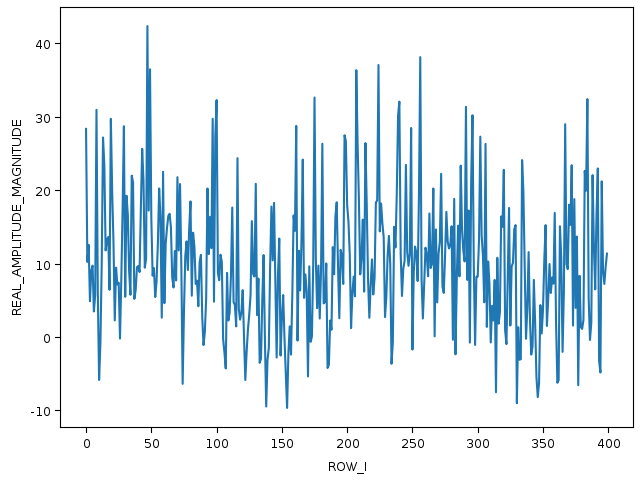

<b style = 'font-size:28px;font-family:Arial;color:#E37C4D'>4. Signal Filtering</b>
<p style = 'font-size:16px;font-family:Arial'>We can use signal filtering to filter out the pure or significant frequencies from our signals. This can be used in noise filtering also. From our random noise signal, lets filter all the frequencies except 100hz.<br><br>
In Vantage Clearscape Analytics we have <b>TD_CONVOLVE</b> function which can filter one signal from another. We also have <b>TD_BINARYSERIESOP</b> function which can perform a point-wise mathematical operation (addition, subtraction, multiplication, or division) on two time series of equal size.<br> First we create a sin wave of 100hz.
</p>

In [21]:
 /* creating filter series with 400 data points*/
 EXECUTE FUNCTION INTO ART(SINUSOIDS4_fil)
 TD_GENSERIES4FORMULA(
  SERIES_SPEC(TABLE_NAME(GenData), SERIES_ID(ID), ROW_AXIS(SEQUENCE(ROW_I)),
  PAYLOAD( FIELDS(MAGNITUDE), CONTENT(REAL))
  ),
  FUNC_PARAMS(Formula('Y = 4.0*sin(6.283185307179586476*X1/4.0)'))
);

Success: 400 rows affected

<p style = 'font-size:16px;font-family:Arial'>Let's see how the filter signal looks like.

In [22]:
/**********************************************************************************/
/*                              PLOT generated sinusoidal signal                  */
/**********************************************************************************/

EXECUTE FUNCTION
TD_Plot
(
    SERIES_SPEC(TABLE_NAME(SINUSOIDS4_fil), ROW_AXIS(SEQUENCE(ROW_I)), 
                SERIES_ID(ID),
                PAYLOAD(FIELDS(Magnitude), CONTENT(REAL)) ),
    FUNC_PARAMS( PLOTS[( TYPE('line'))], IMAGE('png')));

ID ROW_I IMAGE 1 0 0 89504e470d0a1a0a0000000d4948445200000280000001e00802000000bab34bb3000000097048597300000f6100000f6101a83fa7690000200049444154789cecbd5dacaed7512658ef717c13ec04092912cab9e07ac40d42e2b64d24d2cdf4a8bb116a6602b43464d219292d462830b466ba350818e6477620d0c0a46798816eba192432f92740fe4e6c27c44970e29f24fe49e29cc4f639b68fffcff17112efef5d73b1d6aaaae7a9aa6fef6dbcbf837a7febe29cef7df77a57adbfa7aa5655adb596d69aecd33eedd33eedd33eedd36ed3996b5d817ddaa77ddaa77ddaa7d398f602789ff6699ff6699ff6e91aa4bd00dea77ddaa77ddaa77dba06692f80f7699ff6699ff6699fae41da0be07ddaa77ddaa77ddaa76b905e75ad2b50a6755d2f5ebc78c30d372ccb72adebb24ffbb44ffbb44ffbf432536bedca952bdffffddf7fe60c2c7affee0ae08b172f9e3d7bf65ad7629ff6699ff6699ff6e915488f3cf2c8eb5fff7affe6efae00bee1861b44e491471eb9f1c61baf755df6699ff6699ff6699f5e66ba7cf9f2d9b367bb50f3e9efae00ee96e71b6fbcf135af79cdb5aecb3eedd33eedd33eedd3df2a4577ea3e086b9ff6699ff6699ff6e91aa4bd00dea77ddaa77ddaa77dba06692f80f7699ff6699ff6699fae41da0be07ddaa77ddaa77ddaa76b90f602789ff6699ff6699ff6e91aa4bd00dea77ddaa77ddaa77dba06692f80f7699ff6699ff6699fae41da0be07ddaa77ddaa77ddaa76b90f602789ff6699ff6699ff6e91aa4bd00dea77ddaa77ddaa77dba06692f80f7699ff6699ff6699fae41da0be07ddaa77ddaa77ddaa76b90f602789ff6699ff6699ff6e91aa46b20809f7cf2c91ff8811fb8fefaeb774f7a9ff6699ff6699ff6e9ef48ba0602f8d77eedd7def296b71c1c1cec9ef43eedd33eedd33eedd3df91b46b017cfffdf77fe8431f7afbdbdf1effd45a7bdea5cb972ff797af08dd7ff9eebbffb3ffe92ffef0d3dfe88f179ffbf68fbde3937ffc99f393b4fcf37fff37ffed7ff81ba5f6ef3ff3cd1f7bc7272f3ef7edfef8e50bcfdf74f3b9bff8d263fdf160d37ef2f73ffd2befff92967fcb471ef887bf73fbd5ef6efae3ed5fbd74d3cde73e7ffee9fef8ecd597fefe3b6ffbfd735fd3fcbff46777ffecff75c73ae9bde7ce47de70cbad0f5d7aa13f7ee3c917de70cbadefbef391feb8b6f6cffee0736fffd3bbf4f377ddfaf537fee6ad4fbff0ddfe78e7379fb9e9e6739f7ce0527f7cf1a5cd3ffa37b7ffef7f799fe6ffd50f7df99ffcdea75fdaacfdf1afbe74f1a69bcfddfbe873fdf1f1e7bffdc6dfba553b4744fec57fbcf39fff3beb8d3fb9e35b6f78c7272f3cfb627fbcffe2f337dd72ee83f75c18bdb1b67ffaaecffcebf7ddab9fffd6471ffccf7ffbb617be3374ac4f7fedc99b6e3ef7d9879eea8fcfbff8d28fbff3f6dff9c45735fffff09e7bfeabfff3339b75d07bff5d176ebae5dc579fb8d21fbff5f4d537bce3937ffab987fb636bf25fff3f9ffbeffef40bfaf91fdcfef537fee6ad4f5d19bd71d7c3cfde74f3b98fdff7447ffccec1fa8f7fefd3ffeb87ad37fe970f7fe51fffeea7be73307ae3a3f73d76d3cde7ee7ef8d9fef8e495efbcf1376ffd83dbad377efe4fbef0e63ffc9cf6c6fffbb987dff08e4f3efcf4d5fef8e0e3976fbae5dc07ee1ebdb159db7ff96feff81fdf63bdf13b1f7ff0c7df79fbe56f8fdef8ccd79fbce9e6737ffdf5d11b57be73f0e3bf7ddb3b3f66bdf1afde7bef3f7dd75f1fccdef8e03d176ebae5dcfd8f5dee8f8f3ef3e21bdef1c93ff9dcb7b437fe9b3ffafcbff88f77eae77ff8e96fbcf1b76e7de2f277fae33d8f3c77d3cde73ef295c7fbe3770fd67ff2fb9ffaf50f7e45f3ff6f7f71ff3ffa379ffaf64b63ea9e7be089bf77f3b92f7ceb99fef8f40bdf7de36fdefa6f6f7d48f3ffc29f7ef19ffddfd61befbef39137dc72ebf9a7c6d4fdfaa52b37dd72eebd5f7cb43faeadfdf41fdcf1dfffd93dfaf9ef7de2ab7fff9db73df7e24bfdf1f3df78faefdd7ceef6af3ed91f5ff8eec13ffc9ddb6ff9ab0734ffaf7ce0cb3ff9fb9f3ed80c7a7ff1a5c76ebaf9dc572e3cdf1f2f3ef7e2cb00f25f4e20bfb4597ff2ff6020ff170ec8b73df80a00f9ffbbf361ed8d08e47ff0ce5b9fb90a40bef54102f2fd9a3f05f2971e1d533705f25bfedde7b537fec31de72390fffcde8bfdf150207f2a03f2ef7edca6eebf7cf7ddc703f21f7ef66f03e4fff94319901f19bd71e9f277def85bdb81fcad2d40de4ddab500fea55ffaa55ffdd55f7df5ab5f1dff74f9f2e5d7ba74f6ec5911b972e5ca2b42f7a5cd7af5bbeb770f46dfffcd379ffeeaa5173e74efc0e1d5970e3efa95c7ffea4b8fbf38d9d09fdf7bf1ab975ef89b6f0ee0ddfed54be79fbafa575f1a33f5fc532fdcf9ad67dff7451baaf77df1c2972f3c7fdfc5c1173ef695c7cf3f75f5dc0363eadcf3c8b30f3c76f9fd6e68dffb85473ef5f5a71e7f7e70c90f7fe9e2434f5ef9ebaf0fe0ddf1d0d30f3d79e5c353c23d79e5bbb77fedd27bee7a543fffe0dd171e7ce28a4eb5db1eb874fea9ab1fbb6f30d9071fbb7ccfa3cfbff72e57bd2f3c7ad7c3cf7e7df2858fdef7c4f9a7aede3e71fe856f3dfbe0e3573e34abf79d83f5cfef7deca3f73d7ef9db834b7ee84b171ebaf4c2e7be317ae3535f7beafc93573ff2e541eee1a7af7efefcd3eff5bd71d7a35fb978f9cb934b7ee2be27ce3f75f513533fb8f7d1e7ee7becf90f7ed19af3ee3b1fb9e3a1a7954bfee5bd17ce3f79f5d35f1df

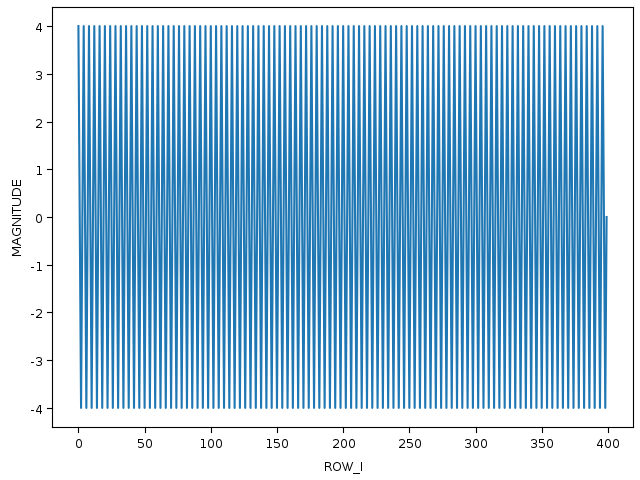

<p style = 'font-size:16px;font-family:Arial'>Now, let's apply this series as the filter

In [23]:
/*************************************************************************/
/*      Convolve Filter Kernel with the Original Signal                 */
/* Original Signal contained sinusoids at: 2, 25,50, 100HZ and noise     */
/*        Filter should erase everything except 100HZ                  */
/*************************************************************************/

EXECUTE FUNCTION INTO VOLATILE ART(ApplyLowPass) 
TD_CONVOLVE(SERIES_SPEC(TABLE_NAME(SINUSOIDS4_noise), SERIES_ID(ID), ROW_AXIS(SEQUENCE(ROW_I)),
                        PAYLOAD( FIELDS(MAGNITUDE), CONTENT(REAL))),
            SERIES_SPEC(TABLE_NAME(SINUSOIDS4_fil), SERIES_ID(ID), ROW_AXIS(SEQUENCE(ROW_I)),
                        PAYLOAD( FIELDS(MAGNITUDE), CONTENT(REAL))),
            INPUT_FMT(INPUT_MODE(MATCH)));

Success: 1024 rows affected

<p style = 'font-size:16px;font-family:Arial'>The TD_CONVOLVE function takes one series representing the source series to be filtered and the other series being the
filter kernel itself. The resultant output is a source series with the kernel filter applied.

In [24]:
SHOW TABLE ApplyLowPass;

,Request Text
1,"CREATE MULTISET VOLATILE TABLE DEMO_USER.ApplyLowPass ,NO FALLBACK , CHECKSUM = DEFAULT, DEFAULT MERGEBLOCKRATIO, MAP = TD_MAP1, ART, LOG ( ID INTEGER NOT NULL, ROW_I INTEGER NOT NULL, REAL_MAGNITUDE FLOAT, IMAG_MAGNITUDE FLOAT) NO PRIMARY INDEX ON COMMIT PRESERVE ROWS;"


In [25]:
/*************************************************************************/
/* Verify that the filtered Signal has the desired freq characteristics  */
/*                             using the DFFT                            */
/*************************************************************************/
--DROP TABLE DfftFilteredSins4;
EXECUTE FUNCTION INTO VOLATILE ART(DfftFilteredSins4) 
TD_DFFT(SERIES_SPEC(TABLE_NAME(ApplyLowPass), SERIES_ID(ID), ROW_AXIS(SEQUENCE(ROW_I)),
                    PAYLOAD( FIELDS(REAL_MAGNITUDE), CONTENT(REAL)) ),
        FUNC_PARAMS( FREQ_STYLE("K_INTEGRAL"), HUMAN_READABLE(1) ),
  OUTPUT_FMT( CONTENT(AMPL_PHASE_RADIANS) ) );


Success: 1026 rows affected

In [26]:
EXECUTE FUNCTION
TD_Plot
(   SERIES_SPEC(TABLE_NAME(DfftFilteredSins4), ROW_AXIS(SEQUENCE(ROW_I)),SERIES_ID(ID),
                PAYLOAD(FIELDS(Amplitude_real_Magnitude),CONTENT(REAL)) ),
    FUNC_PARAMS( PLOTS[( TYPE('line') )], IMAGE('png'))
);

ID ROW_I IMAGE 1 0 0 89504e470d0a1a0a0000000d4948445200000280000001e00802000000bab34bb3000000097048597300000f6100000f6101a83fa7690000200049444154789ceddd7b7cd4d581fffff3996b2e33b9106002891040e4a22862b97861115bed56942eebb5500deb5afad355548a62b5168ae5cb97f52b628b97babd8891a2ad5b1b8d8b02baad1a142a77948808e4c225842433994926c9cc7c3ebf3f3e329904089f402693cf99d7f30f1f9f1c26e464389ef79cf3399f73144dd3040000e8599644570000806444000300900004300000094000030090000430000009604b7405124f55d523478eb85c2e4551125d1700806c344d0b040203060cb058da0d7a096071e4c891fcfcfc44d7020020b3aaaaaabcbcbcd8120258b85c2e2144555595dbed4e745d0000b2f1fbfdf9f9f97ad6c42280853ef3ec76bb333232125d1700809c4ebecbc9222c0000128000060020010860000012800006002001086000001280000600200108600000128000060020010860000012800006002001086000001280000600200108600000128000060020010860000012800086894554edb6973e7dfccd5d89ae08105f8fbfb9ebb6973e8da85aa22b82ee4400c3c4361da8dbb4bf76f5a68a44570488afd59b2a36edafdd7ca02ed115417722806162e1889ae82a003d27cc08582e04300000094000c3c4180e20c9d0e4a54200c3c434ba2324131abc6408609898c68000c984e62e19021800800420806162ccc821a9d0e0254300c3c4e88f9054b8e72219021826a60a9e034612e113a76408609819f98b6442004b86008689698a92e82a003d87291fc910c000002400010c00400210c030314d65460ec984f62e17021826c63d6024151abc64086098198b42914c98f2910c010c13237f915418014b86008689693c1789a4427b970b010c00400210c03031c603482a3478c910c030319529682413eeb9488600060073207e2543000300900004304c4ce3a9482413eeb94886008699f154249200b12b2b02182646c784a4c2948f6408609858745128490c8969d1d5574cf9c825be016c6f2f5aaeaaea92254b3c1e8fc7e359ba7469b41b8d773924c3bf2b920a3d99646c71fddbc3e17028143ab97cf5ead5c5c5c5a5a5a542889933670e1932e4f6db6fef8172c84a139ac2e800922277a5a5c5d3e9fefe2953a6949494e8d725252553a74eed99729daaaabe185555554208afd77bcebf2e7ada7f7f56397841c9e0052511554d745d8078094754bd9dbfb9b52ad175c1d9f0f97c42089fcfd7a13ceef7803d1e8fdbedbef4d24b57ae5c190e87f5c2b2b2b2091326e8d7e3c78f2f2b2beb99729ddfefcf8c919f9f2f84080402ddfc9b23fe54857bc0909f76d205e410df29687dfeb9b9b979f7eedd0f3df4507575f5934f3e2984a8afafcfcacad25f939595555b5bab5fc7bb5ce776bbf5cf233abfdf9f9f9fef72b9baf11747cf50e890904c3495162f95f88e806d369bcd6673b95c93264d5ab366cdf3cf3faf976767677bbd5efddaebf5e6e4e4f44cb94e51948c186eb75b2fece65f1e3d886e0932a37d4baae71e43b2d96cd129e81123466cddba55bfdeb265cbf0e1c37ba61c92d158788564a232e72397f806f01d77dcb167cf9e7038bc77efde7ffff77f9f3973a65e3e7bf6ec458b165556565656562e5ebcf8eebbefee997248468b6e4c40bf0479459f03267f2513df7bc0d75f7ffdcd37dfbc7ffffebcbcbc5b6fbdf5f1c71fd7cb0b0b0bcbcbcbc78e1d2b84983b77eeac59b37aa61c9261ed15920a533e9251b4a4efc31a1a1a3233337d3e5f464646a2eb82ae796d73e5a37fd92984f86ac9f7ec56b675839c5ac3ea053f5b2b8478eae631b77c6b50a2ab832e3b5dcad067c1c492fdc323924cd20f976443004306744c9018ad5b5604304c8dae094944d5b8072c15021826c60e414806d1953ab473c910c030338e4745722182a5420043062ce687c468dcb2228061622a4360241392583204304ced9b3529744c9058dbfc0e1f38e54200c3c49879465261ca4732043064401043621a533c92228061626c8d8b244383970a010c1353d56f66e418224066275a37f75c244300c3c4e88d905498f2910c010c2910c59057db22689545585221806162cc3c23a9d0dc2543004306744c9018777e654500c3c4e898009817010c13d34e9cce4612436231a721d1d0a54200c3d458938224c2074dc910c09001cf474262346e5911c030b1e81434900c68f092218061626a7487a084560388ab98f91deeb94885008689b12605498511b0640860c8805bc09058f483a64a3b970b010c13a33b425261ca473204306440c7048931c1232b021826a6312507c0b408609858db0e4104319200cd5c320430cc8c35a148264cf948860006805e2d3ac1c38e6f92218061621adb1220a930e52317021826a60aee01437ed145fe11dab95c08609898c6880049854f9a72218061626df7c6581f0a79c5b4733e714a85008689b128144945a5c1cb8500868969dc034612d04e71051910c03031c603482adc6a910c010c333b71478c6e09128b3efecb274ec910c030b1081d129289ca474db910c030b5e83d603a26482bdab869e692218061629ac65319482a24b05408609858db694889ad07104fd181afca274eb910c03031168522b930072d17021826a69e388c817e09528bcef4d0d0a54200c3cc989043325139fe4b2e04304c2cd236f265640069c59c079cd07aa0bb11c0303306044826aa42024b850086a9b11734e4d7d6bcf9c4291702182

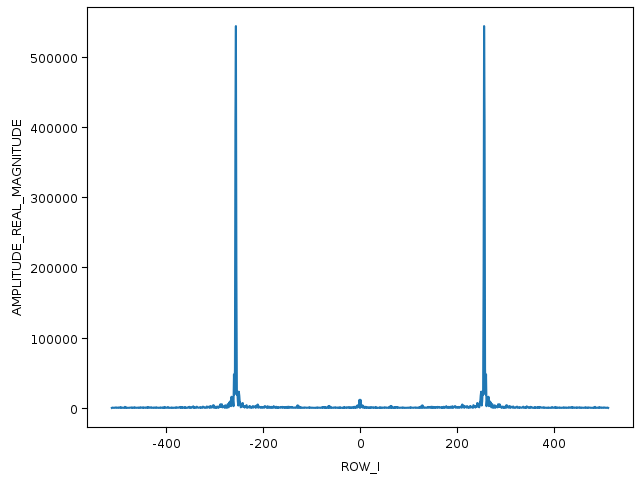

<b style = 'font-size:28px;font-family:Arial;color:#E37C4D'>5. Clean up</b>

In [27]:
Drop TABLE genData;

Success: 17 rows affected

In [28]:
DROP TABLE SINUSOIDS4;

Success: 16 rows affected

In [29]:
DROP TABLE SINUSOIDS4_noise;

Success: 16 rows affected

In [30]:
Drop TABLE SINUSOIDS4_fil;

Success: 16 rows affected

<p style = 'font-size:16px;font-family:Arial'>In this demo we have seen how we can transform timeseries to frequency domain to get significant frequencies and vice-versa and how we can filter out the frequencies from our signal series.</p>

<p style = 'font-size:20px;font-family:Arial;color:#E37C4D'><b>Reference Links:</b></p>
<ul style = 'font-size:16px;font-family:Arial'>
    <li> Unbounded Array Framework: <a href = 'https://docs.teradata.com/r/Teradata-VantageTM-Unbounded-Array-Framework-Time-Series-Reference/Unbounded-Array-Framework'>https://docs.teradata.com/r/Teradata-VantageTM-Unbounded-Array-Framework-Time-Series-Reference/Unbounded-Array-Framework</a></li>


<footer style="paddinga:10px;background:#f9f9f9;border-bottom:3px solid #394851">©2023 Teradata. All Rights Reserved</footer>